In [ ]:
## linear regression
## Ridge regression
#Polynomial regression
# Random forest regression


In [24]:
## Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge


In [26]:
taxiout = pd.read_csv('M1_final.csv')
taxiout = taxiout.drop(columns=['OP_UNIQUE_CARRIER', 'TAIL_NUM','DEST','Wind','Condition'])
taxiout.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,-1,124,636,324,323,448,48,34,58,25,38,29.86,9,17,14
1,11,1,5,-7,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,15
2,11,1,5,40,181,1069,301,341,482,48,34,58,25,38,29.86,9,17,22
3,11,1,5,-2,168,944,345,343,513,48,34,58,25,38,29.86,9,17,12
4,11,1,5,-4,139,760,360,356,499,46,32,58,24,35,29.91,9,17,13


In [27]:
## change the display format of the column
pd.options.display.float_format = '{:.2f}'.format
taxiout.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,-1,124,636,324,323,448,48,34,58,25,38,29.86,9,17,14
1,11,1,5,-7,371,2475,340,333,531,48,34,58,25,38,29.86,9,17,15
2,11,1,5,40,181,1069,301,341,482,48,34,58,25,38,29.86,9,17,22
3,11,1,5,-2,168,944,345,343,513,48,34,58,25,38,29.86,9,17,12
4,11,1,5,-4,139,760,360,356,499,46,32,58,24,35,29.91,9,17,13


In [28]:
## info about our dataset
taxiout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MONTH             28820 non-null  int64  
 1   DAY_OF_MONTH      28820 non-null  int64  
 2   DAY_OF_WEEK       28820 non-null  int64  
 3   DEP_DELAY         28820 non-null  int64  
 4   CRS_ELAPSED_TIME  28820 non-null  int64  
 5   DISTANCE          28820 non-null  int64  
 6   CRS_DEP_M         28820 non-null  int64  
 7   DEP_TIME_M        28820 non-null  int64  
 8   CRS_ARR_M         28820 non-null  int64  
 9   Temperature       28820 non-null  int64  
 10  Dew Point         28820 non-null  object 
 11  Humidity          28820 non-null  int64  
 12  Wind Speed        28820 non-null  int64  
 13  Wind Gust         28820 non-null  int64  
 14  Pressure          28820 non-null  float64
 15  sch_dep           28820 non-null  int64  
 16  sch_arr           28820 non-null  int64 

In [29]:
## statistical summary of the dataset
taxiout.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00
mean,7.89,16.02,4.01,6.37,225.29,1267.75,831.00,828.93,910.87,41.49,57.73,12.37,5.54,30.09,31.09,28.43,20.86
std,4.99,8.75,1.99,38.74,119.48,889.34,299.40,305.86,345.41,8.04,23.47,6.26,11.89,0.30,9.51,8.26,6.85
min,1.00,1.00,1.00,-22.00,57.00,94.00,301.00,1.00,1.00,17.00,0.00,0.00,0.00,29.20,0.00,0.00,5.00
25%,1.00,8.00,2.00,-6.00,124.00,483.00,545.00,542.00,667.00,36.00,46.00,8.00,0.00,29.88,26.00,21.00,16.00
50%,11.00,16.00,4.00,-3.00,188.00,1029.00,856.00,854.00,918.00,42.00,59.00,12.00,0.00,30.11,30.00,30.00,19.00
75%,12.00,24.00,6.00,2.00,365.00,2248.00,1095.00,1097.00,1193.00,47.00,74.00,16.00,0.00,30.32,37.00,35.00,25.00
max,12.00,31.00,7.00,1276.00,697.00,4983.00,1439.00,1440.00,1439.00,68.00,97.00,36.00,49.00,30.75,55.00,46.00,41.00


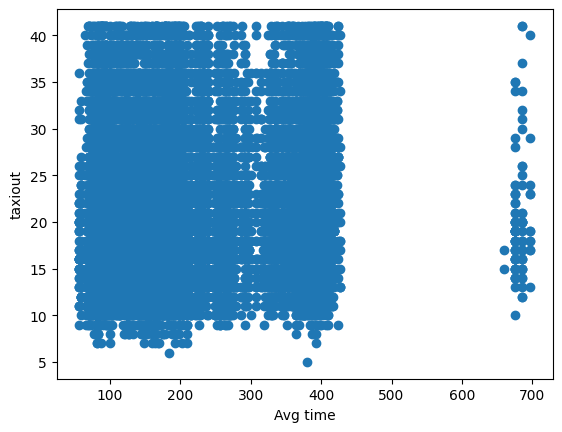

In [30]:
## Exploratory Data Analysis
## cREATE  a scatterplot  of the relationship between the features and the response
## scatter plot for  avg. area income vs price
plt.scatter(taxiout['CRS_ELAPSED_TIME'], taxiout['TAXI_OUT'])

## label the axes
plt.xlabel("Avg time")
plt.ylabel("taxiout")

plt.show()

In [31]:
## correlation matrix
corr_matrix = taxiout.corr()
corr_matrix

C:\Users\HP\AppData\Local\Temp\ipykernel_16344\3365058775.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = taxiout.corr()


,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.00,-0.01,0.03,0.05,-0.02,-0.00,0.00,0.00,-0.01,0.14,0.01,-0.04,-0.05,-0.09,-0.01,-0.02,0.02
DAY_OF_MONTH,-0.01,1.00,-0.03,-0.04,0.00,-0.00,0.00,0.00,0.01,-0.13,0.10,-0.09,-0.09,0.02,-0.00,0.00,-0.02
DAY_OF_WEEK,0.03,-0.03,1.00,-0.01,0.00,0.00,0.01,0.01,-0.00,0.01,0.00,0.10,0.13,0.10,0.02,0.01,0.03
DEP_DELAY,0.05,-0.04,-0.01,1.00,-0.03,-0.03,0.10,0.07,0.04,-0.03,-0.01,0.07,0.04,-0.06,-0.07,-0.01,0.03
CRS_ELAPSED_TIME,-0.02,0.00,0.00,-0.03,1.00,0.99,-0.03,-0.02,0.04,-0.02,0.02,-0.01,-0.01,0.01,0.08,-0.07,0.07
DISTANCE,-0.00,-0.00,0.00,-0.03,0.99,1.00,-0.04,-0.03,0.01,-0.01,0.02,-0.01,-0.01,0.01,0.06,-0.09,0.06
CRS_DEP_M,0.00,0.00,0.01,0.10,-0.03,-0.04,1.00,0.95,0.45,0.09,0.00,0.01,-0.01,-0.01,-0.03,0.50,0.04
DEP_TIME_M,0.00,0.00,0.01,0.07,-0.02,-0.03,0.95,1.00,0.47,0.10,-0.01,0.01,-0.01,-0.01,0.03,0.54,0.06
CRS_ARR_M,-0.01,0.01,-0.00,0.04,0.04,0.01,0.45,0.47,1.00,0.10,-0.03,0.01,0.00,-0.01,0.15,0.42,0.07
Temperature,0.14,-0.13,0.01,-0.03,-0.02,-0.01,0.09,0.10,0.10,1.00,0.05,0.01,-0.04,-0.38,-0.02,0.08,-0.07


##The Correlation coefficient between all the input parameters and taxi out variable is less than 0.2 which means that there is no direct corelation between the input provided and taxi out variable.
The below heatmap also supports this observation

<AxesSubplot: >

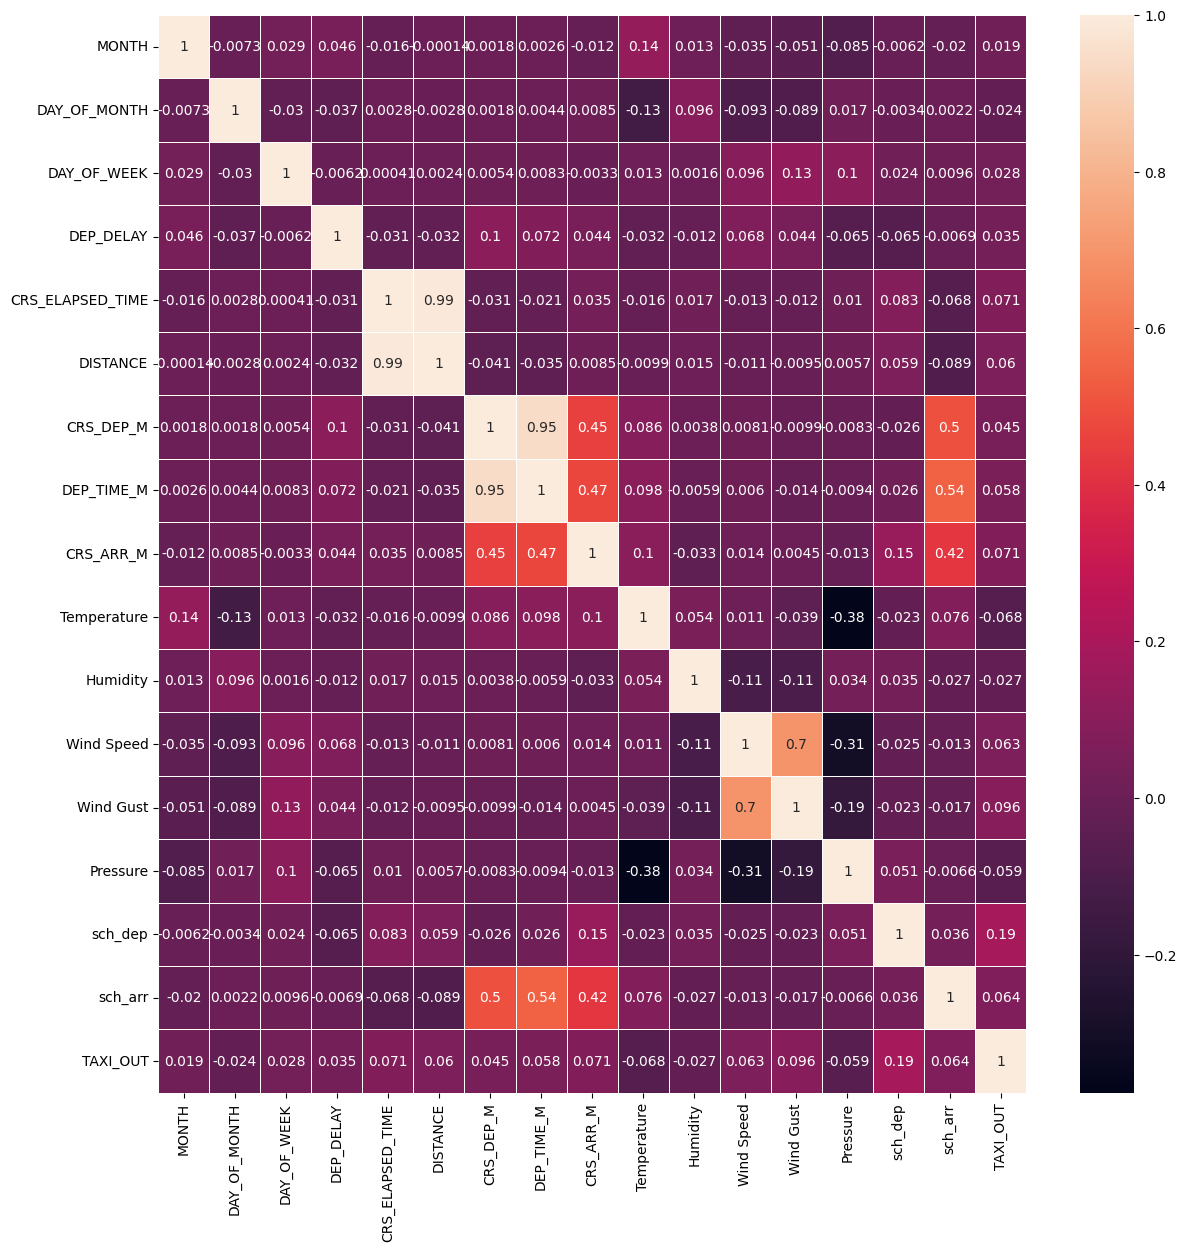

In [61]:
## heatmap
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr_matrix, annot=True,linewidths=.5, ax=ax)

In [69]:
## specifying the x and y variables
X = taxiout.iloc[:, 0:17]
X
y = taxiout.iloc[:, 17]

In [91]:
## train, test and split my data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=32)
X_train

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr
9767,11,30,6,54,78,264,1380,1434,18,33,18,54,7,0,30.02,20,18
19142,1,1,3,-7,81,184,1009,1002,1090,38,22,53,18,26,29.82,26,31
6381,11,20,3,-3,384,2422,675,672,879,44,34,68,20,0,29.93,29,19
3104,11,10,7,18,175,944,1020,1038,1195,49,35,59,10,0,30.02,33,28
24591,1,19,7,0,346,2153,485,485,711,43,31,62,13,23,29.70,45,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20414,1,5,7,76,184,740,995,1071,1119,37,20,50,15,23,29.99,30,34
27516,1,28,2,-10,141,541,480,470,621,39,27,62,21,25,29.80,37,37
9526,11,30,6,-12,114,427,630,618,744,39,14,36,15,0,30.08,19,22
9771,12,1,7,-10,124,636,321,311,445,30,16,56,6,0,30.01,11,24


In [71]:
## STANDARD  SCALER
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [72]:
## lINEAR  REGRESSION
lin_reg = LinearRegression()

lin_reg.fit(X_train, Y_train)


LinearRegression()

In [73]:
pred_lin = lin_reg.predict(X_test)

In [74]:
## create a data frame for predictions
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_lin})




,Actual,Predicted
9362,23,22.37
23840,14,22.20
24617,22,22.89
24899,19,24.68
2007,20,18.61
...,...,...
25794,24,21.23
9596,21,18.50
23574,26,18.44
3772,19,23.83


In [75]:
## MAE
##MSE
## RMSE
## R2   --- 0.99, 0.91  --- 0-1    0.24, 0.11, 0.05, 0.91, 0.92 --- 0.08 

print('MAE:', metrics.mean_absolute_error(Y_test, pred_lin))
print('MSE:', metrics.mean_squared_error(Y_test, pred_lin))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_lin)))
print('R2:', metrics.r2_score(Y_test, pred_lin))


MAE: 5.25815201481499
MSE: 43.684896274557936
RMSE: 6.609455066384666
R2: 0.08136347066543392


In [88]:
## Lasso Regression
model_lasso = Lasso(alpha=0.99)
model_lasso.fit(X_train, Y_train)


Lasso(alpha=0.99)

In [89]:
pred_lasso = model_lasso.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_lasso})

,Actual,Predicted
9362,23,21.01
23840,14,21.08
24617,22,21.12
24899,19,21.39
2007,20,20.81
...,...,...
25794,24,20.74
9596,21,20.70
23574,26,20.84
3772,19,20.88


In [90]:
print('MAE:', metrics.mean_absolute_error(Y_test, pred_lasso))
print('MSE:', metrics.mean_squared_error(Y_test, pred_lasso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_lasso)))
print('R2:', metrics.r2_score(Y_test, pred_lasso))

MAE: 5.473367369421306
MSE: 46.84134842436761
RMSE: 6.8440739639755215
R2: 0.014987388879919017


In [77]:
## random foresst regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=32)
rf_reg.fit(X_train, Y_train)

RandomForestRegressor(random_state=32)

In [78]:
rf_reg_pred = rf_reg.predict(X_test)

In [79]:
pd.DataFrame({'Actual': Y_test, 'Predicted': rf_reg_pred})

,Actual,Predicted
9362,23,23.77
23840,14,17.64
24617,22,21.42
24899,19,17.94
2007,20,21.53
...,...,...
25794,24,22.57
9596,21,18.35
23574,26,21.61
3772,19,21.33


In [80]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(Y_test, rf_reg_pred))
print('MSE:', metrics.mean_squared_error(Y_test, rf_reg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, rf_reg_pred)))
print('R2:', metrics.r2_score(Y_test, rf_reg_pred))

MAE: 4.435350451075642
MSE: 32.862126995142255
RMSE: 5.732549781305196
R2: 0.3089522268832553


In [81]:
## Polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_train_2 = poly_reg.fit_transform(X_train)
X_test_2 = poly_reg.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_train_2, Y_train)


LinearRegression()

In [82]:
poly_pred = poly_reg.predict(X_test_2)
pd.DataFrame({'Actual': Y_test, 'Predicted': poly_pred})

,Actual,Predicted
9362,23,21.19
23840,14,25.31
24617,22,22.37
24899,19,23.73
2007,20,18.40
...,...,...
25794,24,21.02
9596,21,21.75
23574,26,18.40
3772,19,23.24


In [83]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(Y_test, poly_pred))
print('MSE:', metrics.mean_squared_error(Y_test, poly_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, poly_pred)))
print('R2:', metrics.r2_score(Y_test, poly_pred))

MAE: 5.126540950622488
MSE: 41.98701887712634
RMSE: 6.479739105637382
R2: 0.11706762319012587


In [84]:
## ridge regression
model_ridge = Ridge(alpha=0.99, random_state= 32)
model_ridge.fit(X_train, Y_train)


Ridge(alpha=0.99, random_state=32)

In [85]:
## make predictions
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': Y_test, 'Predicted': pred_ridge})

,Actual,Predicted
9362,23,22.37
23840,14,22.21
24617,22,22.88
24899,19,24.68
2007,20,18.61
...,...,...
25794,24,21.23
9596,21,18.50
23574,26,18.44
3772,19,23.83


In [86]:
## mneasuring accuracy
print('MAE:', metrics.mean_absolute_error(Y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(Y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, pred_ridge)))
print('R2:', metrics.r2_score(Y_test, pred_ridge))

MAE: 5.258187581661194
MSE: 43.685130500075914
RMSE: 6.609472785334388
R2: 0.08135854520754637
